In [491]:
import pandas as pd

In [619]:
data= pd.read_csv("C:/Users/anything/Desktop/venu/my work/own project/re_arrange.csv")

In [620]:
data.head()

,date,Year_Value
0,1/1/2011,NaN
1,1/2/2011,NaN
2,1/3/2011,NaN
3,1/4/2011,NaN
4,1/5/2011,NaN


In [621]:
data.isnull().sum()

date            0
Year_Value    137
dtype: int64

In [622]:
data=data[59:]

In [623]:
data.isnull().sum()

date           0
Year_Value    78
dtype: int64

In [624]:
data=data.reset_index()

In [625]:
data=data[['date','Year_Value']]

In [626]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3594 non-null   object 
 1   Year_Value  3516 non-null   float64
dtypes: float64(1), object(1)
memory usage: 56.3+ KB


In [627]:
data["Year_Value"]=data["Year_Value"].fillna((data["Year_Value"].fillna(method='bfill')+data["Year_Value"].fillna(method='ffill'))/2)

In [628]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3594 non-null   object 
 1   Year_Value  3594 non-null   float64
dtypes: float64(1), object(1)
memory usage: 56.3+ KB


In [629]:
# changing the date formate
data['date'] = pd.to_datetime(data.date)

In [630]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3594 non-null   datetime64[ns]
 1   Year_Value  3594 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 56.3 KB


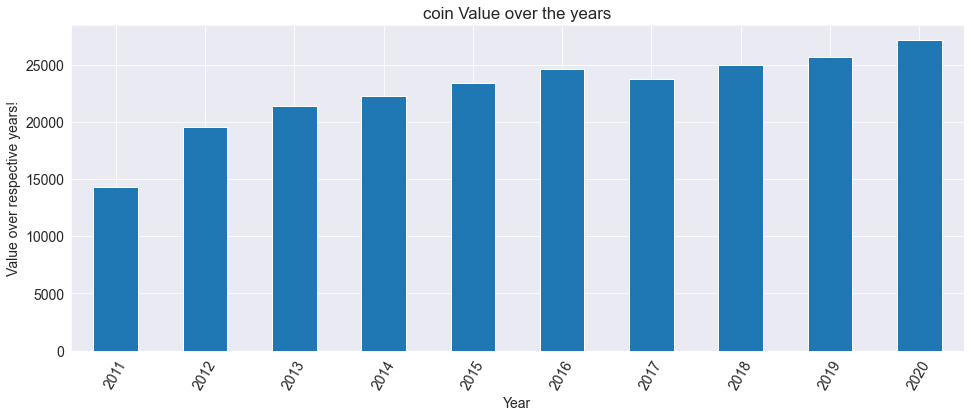

In [631]:
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['Total'] = data['Year_Value']
grp_by_year = data.groupby('Year')['Total'].sum()
grp_by_year.plot(kind='bar');
plt.title('coin Value over the years')
plt.ylabel('Value over respective years!');
plt.xticks(rotation=60);

In [632]:
average_rupee_value = data['Total'].sum()/len(data.index)
print('average_rupee_value over the years: {}'.format(average_rupee_value))

average_rupee_value over the years: 63.167110914023375


In [633]:
years=data.Year.unique() 
months=sorted(data.Month.unique())

In [634]:
avg=[]
for i in years:
    l=data[data["Year"]==i].sum()
    print("the avg prices of ",i,"is   ",l["Year_Value"]/len(data[data["Year"]==i]))
    avg.append(l["Year_Value"]/len(data[data["Year"]==i]))

the avg prices of  2011 is    46.79679901960784
the avg prices of  2012 is    53.35978551912569
the avg prices of  2013 is    58.53338150684931
the avg prices of  2014 is    61.00487808219178
the avg prices of  2015 is    64.11646095890411
the avg prices of  2016 is    67.17585601092897
the avg prices of  2017 is    65.09728
the avg prices of  2018 is    68.39985
the avg prices of  2019 is    70.39844780821917
the avg prices of  2020 is    74.12806673497268


In [635]:
avg_months=[]
for i in years:
    for j in months:
        k=data[data["Year"]== i]
        month=k[k["Month"] ==j].sum()
        month/len(k[k["Month"]==j])
        print(" the avg of",j,"rd month with respect ",i,"year",month['Year_Value']/len(k[k["Month"]==j]))
        avg_months.append(month['Year_Value']/len(k[k["Month"]==j]))

<ipython-input-635-08c7688d9fe9>:7: RuntimeWarning: invalid value encountered in double_scalars
  print(" the avg of",j,"rd month with respect ",i,"year",month['Year_Value']/len(k[k["Month"]==j]))
<ipython-input-635-08c7688d9fe9>:8: RuntimeWarning: invalid value encountered in double_scalars
  avg_months.append(month['Year_Value']/len(k[k["Month"]==j]))
<ipython-input-635-08c7688d9fe9>:7: RuntimeWarning: invalid value encountered in double_scalars
  print(" the avg of",j,"rd month with respect ",i,"year",month['Year_Value']/len(k[k["Month"]==j]))
<ipython-input-635-08c7688d9fe9>:8: RuntimeWarning: invalid value encountered in double_scalars
  avg_months.append(month['Year_Value']/len(k[k["Month"]==j]))


 the avg of 1 rd month with respect  2011 year nan
 the avg of 2 rd month with respect  2011 year nan
 the avg of 3 rd month with respect  2011 year 44.92319354838712
 the avg of 4 rd month with respect  2011 year 44.29526666666667
 the avg of 5 rd month with respect  2011 year 44.83490322580646
 the avg of 6 rd month with respect  2011 year 44.81853333333334
 the avg of 7 rd month with respect  2011 year 44.39461290322579
 the avg of 8 rd month with respect  2011 year 45.31879032258066
 the avg of 9 rd month with respect  2011 year 47.315900000000006
 the avg of 10 rd month with respect  2011 year 49.16920967741936
 the avg of 11 rd month with respect  2011 year 50.57483333333334
 the avg of 12 rd month with respect  2011 year 52.31685483870969
 the avg of 1 rd month with respect  2012 year 51.229354838709675
 the avg of 2 rd month with respect  2012 year 49.166465517241384
 the avg of 3 rd month with respect  2012 year 50.228322580645155
 the avg of 4 rd month with respect  2012 year

In [636]:
data["diff"]=data["Year_Value"]

In [637]:
for i in range(1,len(data)):
    data["diff"][i]=data["Year_Value"][i]-data["Year_Value"][i-1]

<ipython-input-637-6df842bc6a05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["diff"][i]=data["Year_Value"][i]-data["Year_Value"][i-1]


In [638]:
data["diff"][0]=0

<ipython-input-638-141819766af0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["diff"][0]=0


In [639]:
print("this is data where we hava max differ we got           \n\n\n",data[data["diff"] ==data["diff"].max()][["date","diff"]])

this is data where we hava max differ we got           


           date   diff
911 2013-08-28  2.815


In [640]:
print("this is data where we hava negative   differ we got    \n\n\n",data[data["diff"] ==data["diff"].min()][["date","diff"]])

this is data where we hava negative   differ we got    


           date  diff
186 2011-09-03 -2.45


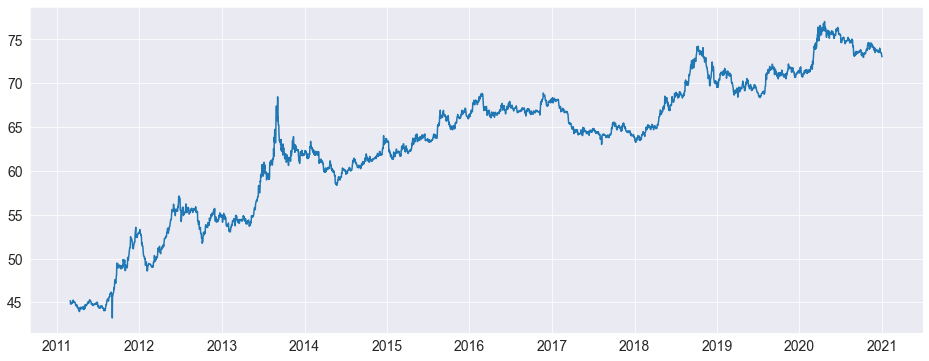

In [641]:
plt.plot(data["date"],data["Year_Value"])

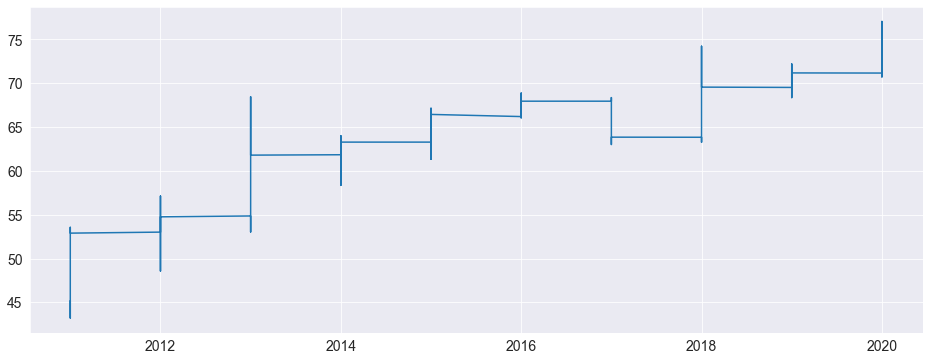

In [642]:
#from this graph we can see the entering prices ,lowest prices ,highest prices ,year ending prices
plt.plot(data["Year"],data["Year_Value"])

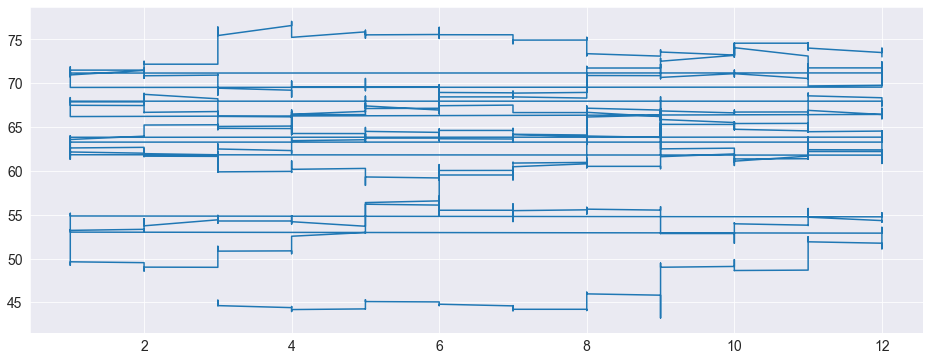

In [643]:
plt.plot(data["Month"],data["Year_Value"])

# Candlestick

In [580]:
cd_data=data

In [544]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpdates

In [540]:
#cd_data=data
cd_data['date'] = pd.to_datetime(cd_data['date'])
cd_data

,date,Year_Value,Year,Month,Total,diff
0,2011-03-01,45.20000,2011,3,45.20000,0.00000
1,2011-03-02,44.84600,2011,3,44.84600,-0.35400
2,2011-03-03,44.80000,2011,3,44.80000,-0.04600
3,2011-03-04,44.90000,2011,3,44.90000,0.10000
4,2011-03-05,44.90600,2011,3,44.90600,0.00600
...,...,...,...,...,...,...
3589,2020-12-27,73.50915,2020,12,73.50915,0.00000
3590,2020-12-28,73.49870,2020,12,73.49870,-0.01045
3591,2020-12-29,73.35415,2020,12,73.35415,-0.14455
3592,2020-12-30,73.18660,2020,12,73.18660,-0.16755


In [545]:
cd_data['date'] = cd_data['date'].map(mpdates.date2num)

In [550]:
cd_data

,date,Year_Value,Year,Month,Total,diff
0,15034.0,45.20000,2011,3,45.20000,0.00000
1,15035.0,44.84600,2011,3,44.84600,-0.35400
2,15036.0,44.80000,2011,3,44.80000,-0.04600
3,15037.0,44.90000,2011,3,44.90000,0.10000
4,15038.0,44.90600,2011,3,44.90600,0.00600
...,...,...,...,...,...,...
3589,18623.0,73.50915,2020,12,73.50915,0.00000
3590,18624.0,73.49870,2020,12,73.49870,-0.01045
3591,18625.0,73.35415,2020,12,73.35415,-0.14455
3592,18626.0,73.18660,2020,12,73.18660,-0.16755


# Simple Exponential Smoothing

In [582]:
df1=data[["date","Total"]]
df1

,date,Total
0,2011-03-01,45.20000
1,2011-03-02,44.84600
2,2011-03-03,44.80000
3,2011-03-04,44.90000
4,2011-03-05,44.90600
...,...,...
3589,2020-12-27,73.50915
3590,2020-12-28,73.49870
3591,2020-12-29,73.35415
3592,2020-12-30,73.18660


In [585]:
df1.set_index('date', inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3594 entries, 2011-03-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   3594 non-null   float64
dtypes: float64(1)
memory usage: 56.2 KB


In [586]:
df1.head()

,Total
date,
2011-03-01,45.200
2011-03-02,44.846
2011-03-03,44.800
2011-03-04,44.900
2011-03-05,44.906


In [587]:
train=df1[:2500]
test=df1[2500:]

In [588]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train.values )
model_fit = model.fit()

c:\users\anything\appdata\local\programs\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [589]:
predictions_ = model_fit.predict(len(test))

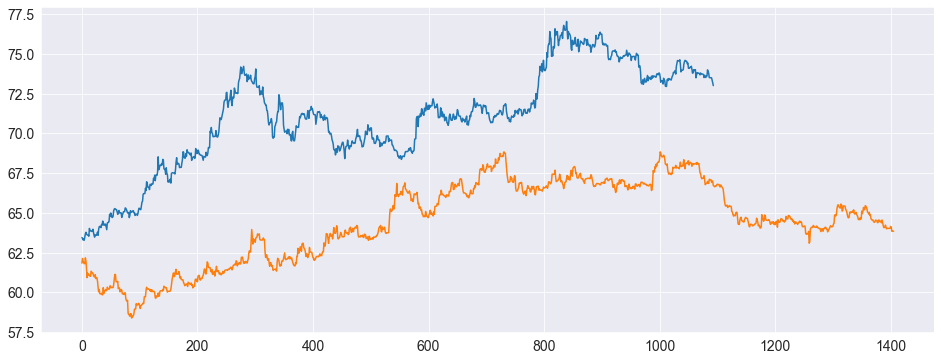

In [590]:
plt.plot(test.values)
plt.plot(predictions_)

# Auto Regression


In [591]:
split = len(df1) - int(0.2*len(df))
train, test = df1['Total'][0:split], df1['Total'][split:]

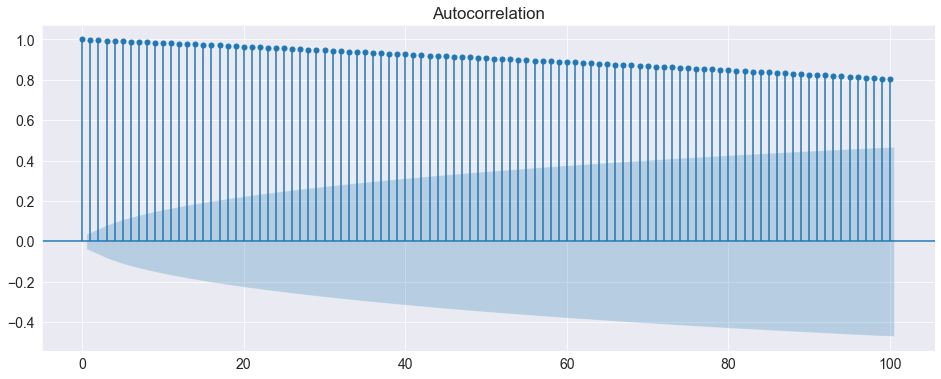

In [592]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train, lags = 100)
plt.show()

# Naive Methods

In [593]:
import numpy
print (
   'Mean: ',numpy.mean(df1['Total']), 
   'Standard Deviation: ',numpy.std(df1['Total']),
    'Maximum: ',max(df1['Total']),'Minimum: ',min(df1['Total'])
)

Mean:  63.167110914023375 Standard Deviation:  7.898871275311533 Maximum:  77.051 Minimum:  43.22


In [594]:
df1['Total']
df1['T_t-1'] = df1['Total'].shift(1)

<ipython-input-594-fa6777e7d8bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['T_t-1'] = df1['Total'].shift(1)


In [595]:
df_naive = df1[['Total','T_t-1']][1:]

In [596]:
from sklearn import metrics
from math import sqrt

true = df_naive['Total']
prediction = df_naive['T_t-1']
error = sqrt(metrics.mean_squared_error(true,prediction))
print ('RMSE for Naive Method 1: ', error)

RMSE for Naive Method 1:  0.2565925765493711


In [597]:
df1['T_rm'] = df1['Total'].rolling(3).mean().shift(1)
df_naive = df1[['Total','T_rm']].dropna()

<ipython-input-597-ad11379c1d5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['T_rm'] = df1['Total'].rolling(3).mean().shift(1)


In [598]:
true = df_naive['Total']
prediction = df_naive['T_rm']
error = sqrt(metrics.mean_squared_error(true,prediction))
print ('RMSE for Naive Method 2: ', error)

RMSE for Naive Method 2:  0.30250121424881965


given data time series and histgram

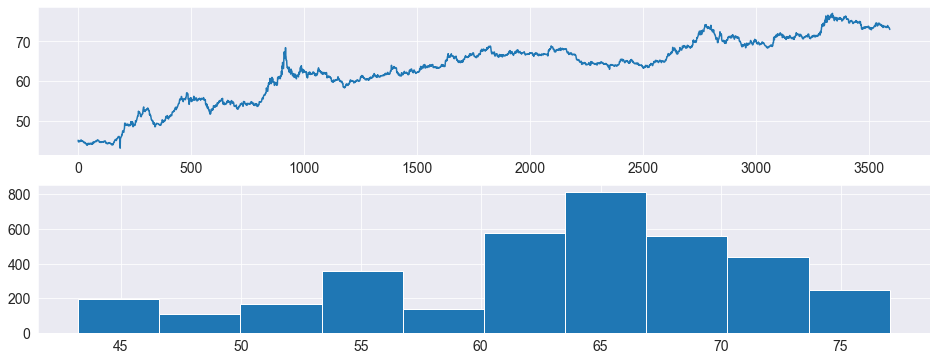

In [599]:
from pandas import read_csv
from matplotlib import pyplot
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(data["Total"])
# histogram
pyplot.subplot(212)
pyplot.hist(data["Total"])
pyplot.show()

# Square Root Transform

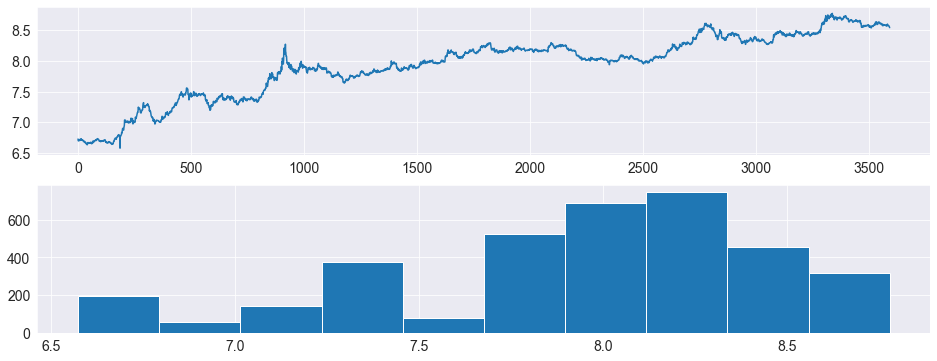

In [600]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

dataframe = DataFrame(data["Total"])
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

# Log Transform

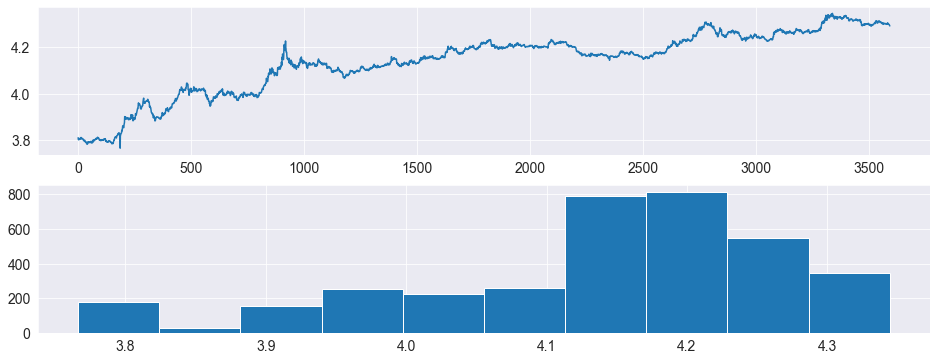

In [601]:
from pandas import read_csv
from pandas import DataFrame
from numpy import log
from matplotlib import pyplot
dataframe = DataFrame(data["Total"])
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

In [602]:
constant=45   # we have to change it and check also
transform = log(constant + x)

In [603]:
transform

array([3.8286414 , 3.8501476 , 3.87120101, 3.8918203 , 3.91202301,
       3.93182563, 3.95124372, 3.97029191, 3.98898405, 4.00733319,
       4.02535169, 4.04305127, 4.06044301, 4.07753744, 4.09434456,
       4.11087386, 4.12713439, 4.14313473, 4.15888308, 4.17438727,
       4.18965474, 4.20469262, 4.21950771, 4.2341065 , 4.24849524,
       4.26267988, 4.27666612, 4.29045944, 4.30406509, 4.31748811,
       4.33073334, 4.34380542, 4.35670883, 4.36944785, 4.38202663,
       4.39444915, 4.40671925, 4.41884061, 4.4308168 , 4.44265126,
       4.4543473 , 4.46590812, 4.47733681, 4.48863637, 4.49980967,
       4.51085951, 4.52178858, 4.53259949, 4.54329478, 4.55387689,
       4.56434819, 4.57471098, 4.58496748, 4.59511985, 4.60517019,
       4.61512052, 4.62497281, 4.63472899, 4.6443909 , 4.65396035,
       4.66343909, 4.67282883, 4.68213123, 4.69134788, 4.70048037,
       4.7095302 , 4.71849887, 4.72738782, 4.73619845, 4.74493213,
       4.75359019, 4.76217393, 4.77068462, 4.77912349, 4.78749

# Box-Cox Transform

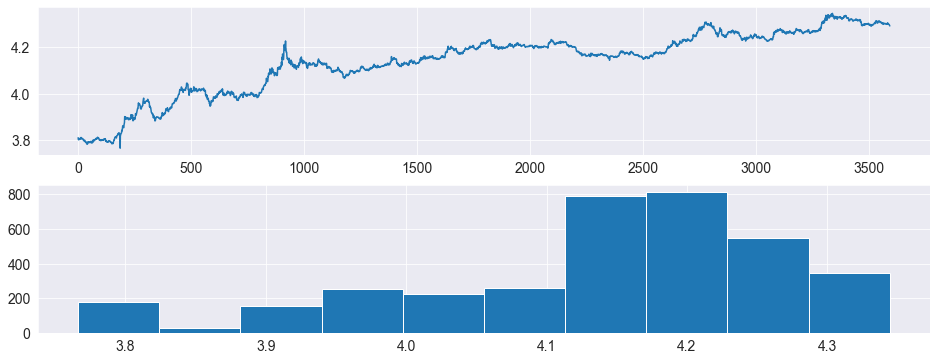

In [604]:

from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
dataframe = DataFrame(data["Total"])
dataframe.columns = ['passengers']
dataframe['passengers'] = boxcox(dataframe['passengers'], lmbda=0.0)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

Lambda: 3.141259


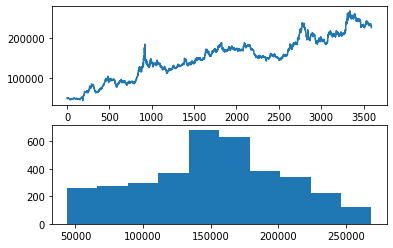

In [85]:
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
dataframe = DataFrame(data["Total"])
dataframe.columns = ['passengers']
dataframe['passengers'], lam = boxcox(dataframe['passengers'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

# ARCH Model

In [333]:
from arch import arch_model

Iteration:      1,   Func. Count:     18,   Neg. LLF: 88230.50223869189
Iteration:      2,   Func. Count:     36,   Neg. LLF: 145.16343062922158
Iteration:      3,   Func. Count:     54,   Neg. LLF: 128.1580370626462
Iteration:      4,   Func. Count:     72,   Neg. LLF: 109.21755150713977
Iteration:      5,   Func. Count:     90,   Neg. LLF: 36.505742305639636
Iteration:      6,   Func. Count:    108,   Neg. LLF: 39.657385490391924
Iteration:      7,   Func. Count:    126,   Neg. LLF: 28.719725927033075
Iteration:      8,   Func. Count:    143,   Neg. LLF: 28.020270372022498
Iteration:      9,   Func. Count:    161,   Neg. LLF: 34.94721660620315
Iteration:     10,   Func. Count:    180,   Neg. LLF: 30.036230630415428
Iteration:     11,   Func. Count:    198,   Neg. LLF: 26.916795512597986
Iteration:     12,   Func. Count:    216,   Neg. LLF: 35.23298993914244
Iteration:     13,   Func. Count:    235,   Neg. LLF: 25.55778101990724
Iteration:     14,   Func. Count:    253,   Neg. LLF: 25

c:\users\anything\appdata\local\programs\python39\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


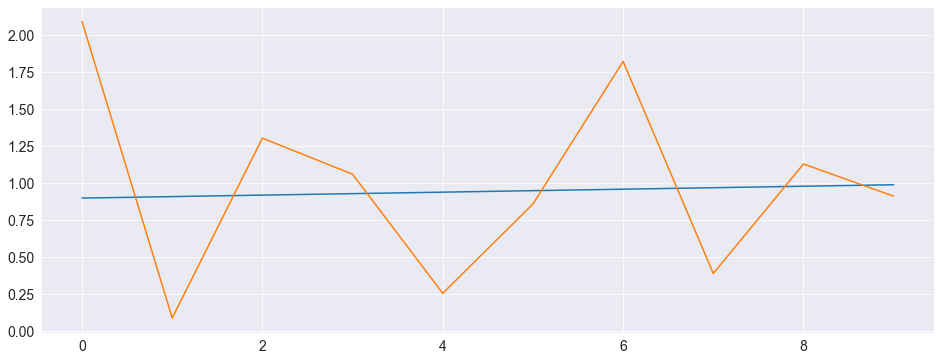

In [617]:

# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
data_arch = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
n_test = 10
train, test = data_arch[:-n_test], data_arch[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='ARCH', p=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()


Iteration:      1,   Func. Count:     18,   Neg. LLF: 19912.137708714952
Iteration:      2,   Func. Count:     35,   Neg. LLF: 19912.134297180775
Iteration:      3,   Func. Count:     52,   Neg. LLF: 19912.130890059278
Iteration:      4,   Func. Count:     69,   Neg. LLF: 19912.128853998434
Iteration:      5,   Func. Count:     86,   Neg. LLF: 19912.12797353296
Iteration:      6,   Func. Count:    103,   Neg. LLF: 19912.127252621984
Iteration:      7,   Func. Count:    120,   Neg. LLF: 19912.126995405033
Iteration:      8,   Func. Count:    137,   Neg. LLF: 19912.126795756878
Iteration:      9,   Func. Count:    154,   Neg. LLF: 19912.12675426617
Iteration:     10,   Func. Count:    171,   Neg. LLF: 19912.12672199255
Iteration:     11,   Func. Count:    188,   Neg. LLF: 19912.126714320617
Iteration:     12,   Func. Count:    205,   Neg. LLF: 19912.126712593345
Iteration:     13,   Func. Count:    222,   Neg. LLF: 19912.12671220564
Optimization terminated successfully    (Exit mode 0)
 

c:\users\anything\appdata\local\programs\python39\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


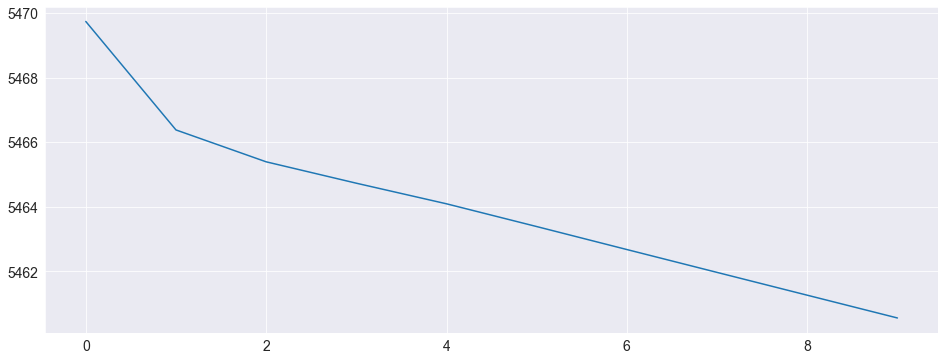

In [644]:

# for the your data 
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
# split into train/test
n_test = 10
train, test = data["Total"][:-n_test], data["Total"][-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='ARCH', p=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=10)
# plot the actual variance
#var = [i*0.01 for i in range(0,100)]
#pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()


In [645]:
model_fit

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                  Total   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -19912.1
Distribution:                  Normal   AIC:                           39856.3
Method:            Maximum Likelihood   BIC:                           39955.2
                                        No. Observations:                 3584
Date:                Sun, May 09 2021   Df Residuals:                     3584
Time:                        07:41:54   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          6.3014      3.256      1.935  5.295e-02 

# GARCH Model

In [610]:
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)

Iteration:      1,   Func. Count:     33,   Neg. LLF: 134.2317665883839
Iteration:      2,   Func. Count:     70,   Neg. LLF: 95037.44797229694
Iteration:      3,   Func. Count:    103,   Neg. LLF: 544.066389970286
Iteration:      4,   Func. Count:    136,   Neg. LLF: 359.8017126479675
Iteration:      5,   Func. Count:    169,   Neg. LLF: 120.68471968782639
Iteration:      6,   Func. Count:    202,   Neg. LLF: 57.67988013320545
Iteration:      7,   Func. Count:    235,   Neg. LLF: 37.23384273335416
Iteration:      8,   Func. Count:    268,   Neg. LLF: 44.28489415198434
Iteration:      9,   Func. Count:    301,   Neg. LLF: 30.95571180673157
Iteration:     10,   Func. Count:    334,   Neg. LLF: 26.957526536488594
Iteration:     11,   Func. Count:    366,   Neg. LLF: 31.358086523635947
Iteration:     12,   Func. Count:    400,   Neg. LLF: 30.014479804149886
Iteration:     13,   Func. Count:    433,   Neg. LLF: 28.461161767331728
Iteration:     14,   Func. Count:    466,   Neg. LLF: 27.699

c:\users\anything\appdata\local\programs\python39\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


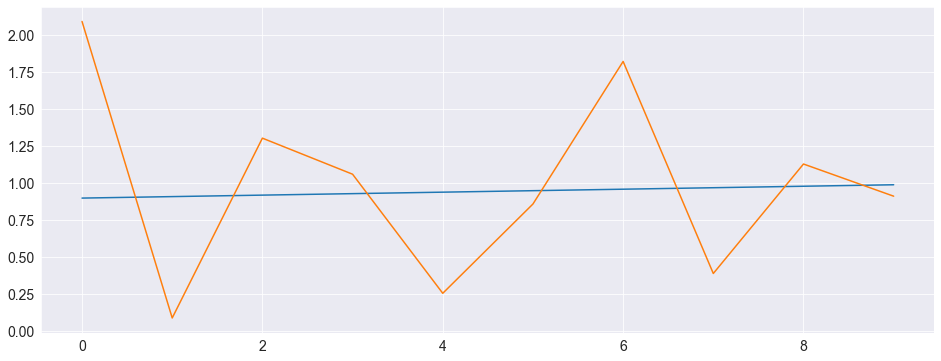

In [618]:

# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
data_garch = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
n_test = 10
train, test = data_garch[:-n_test], data_garch[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

Iteration:      1,   Func. Count:     33,   Neg. LLF: 19912.548208251672
Iteration:      2,   Func. Count:     65,   Neg. LLF: 19913.022568775814
Iteration:      3,   Func. Count:     98,   Neg. LLF: 19912.163593150537
Iteration:      4,   Func. Count:    130,   Neg. LLF: 19912.162487763726
Iteration:      5,   Func. Count:    162,   Neg. LLF: 19912.161739981493
Iteration:      6,   Func. Count:    194,   Neg. LLF: 19912.160411571953
Iteration:      7,   Func. Count:    226,   Neg. LLF: 19912.160344689182
Iteration:      8,   Func. Count:    258,   Neg. LLF: 19912.160298578186
Iteration:      9,   Func. Count:    290,   Neg. LLF: 19912.16028973906
Iteration:     10,   Func. Count:    322,   Neg. LLF: 19912.160276124247
Iteration:     11,   Func. Count:    354,   Neg. LLF: 19912.160272605997
Iteration:     12,   Func. Count:    386,   Neg. LLF: 19912.160296095422
Iteration:     13,   Func. Count:    419,   Neg. LLF: 19912.160268941545
Iteration:     14,   Func. Count:    451,   Neg. LLF

c:\users\anything\appdata\local\programs\python39\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


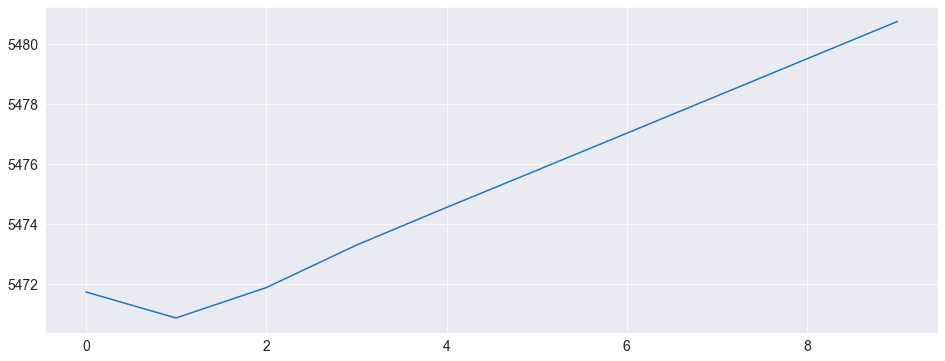

In [646]:
# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
# split into train/test
n_test = 10
train, test = data["Total"][:-n_test], data["Total"][-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance

#pyplot.plot(test)
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

In [647]:
model_fit

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  Total   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -19912.1
Distribution:                  Normal   AIC:                           39886.3
Method:            Maximum Likelihood   BIC:                           40078.0
                                        No. Observations:                 3584
Date:                Sun, May 09 2021   Df Residuals:                     3584
Time:                        07:42:09   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.4310      0.877      1.631      0.103 

In [665]:
df2=data[["date","Total"]]
df2.set_index('date', inplace=True)
df2.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3594 entries, 2011-03-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   3594 non-null   float64
dtypes: float64(1)
memory usage: 56.2 KB


In [673]:
df2_train=df2[:3000]
df2_test=df2[3000:]

In [656]:
from sklearn.preprocessing import MinMaxScaler

In [664]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df2)

MinMaxScaler()